In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from akita_utils.format_io import h5_to_df
from scipy import stats

In [2]:
# python collect_jobs_and_clean.py /scratch2/smaruj/background_directory/shuffling_m0/ -g -l

In [3]:
stat_names = ["SCD"]

In [4]:
data_dir = "/scratch2/smaruj/background_directory/shuffling_m0/"

In [5]:
df = h5_to_df(data_dir+"/STATS_OUT.h5", stat_names, average=False) 

In [6]:
def average_stat(df, model_index, head_index, stat="SCD"):
    if head_index == 1:
        target_indices = 6
    else:
        target_indices = 5
        
    df[f"{stat}"] = df[[f"{stat}_h{head_index}_m{model_index}_t{target_index}" for target_index in range(target_indices)]].mean(axis=1)
    return df

In [7]:
df = average_stat(df, model_index=0, head_index=1)

In [8]:
df

,SCD_h1_m0_t0,SCD_h1_m0_t1,SCD_h1_m0_t2,SCD_h1_m0_t3,SCD_h1_m0_t4,SCD_h1_m0_t5,GC_content,chrom,ctcf_detection_threshold,end,mutation_method,shuffle_parameter,start,SCD
0,400.00000,326.0000,854.50000,1250.00000,194.375000,204.375000,0.361846,chr3,8,143915008,permute_whole_seq,1,142604288,538.00000
1,315.00000,228.0000,282.75000,407.25000,22.734375,29.062500,0.362067,chr14,8,92299264,permute_whole_seq,1,90988544,214.12500
2,359.25000,241.5000,574.50000,839.50000,93.500000,77.750000,0.362212,chr18,8,48764928,permute_whole_seq,1,47454208,364.75000
3,312.75000,262.0000,349.25000,500.25000,31.593750,20.765625,0.362505,chr15,8,23144448,permute_whole_seq,1,21833728,246.12500
4,355.50000,28.5625,749.50000,1304.00000,139.625000,190.625000,0.362792,chr5,8,116283392,permute_whole_seq,1,114972672,461.25000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,56.62500,72.6250,59.59375,59.28125,60.062500,48.250000,0.501906,chr5,8,134103040,permute_whole_seq,32,132792320,59.40625
3536,46.40625,43.3125,98.87500,107.75000,79.687500,73.312500,0.501983,chr11,8,98248704,permute_whole_seq,32,96937984,74.93750
3537,38.78125,46.0000,54.84375,53.81250,51.750000,47.312500,0.502420,chr1,8,103823360,permute_whole_seq,32,102512640,48.75000
3538,51.46875,66.3750,62.25000,60.78125,64.062500,54.281250,0.502657,chr11,8,93988864,permute_whole_seq,32,92678144,59.87500


<Axes: xlabel='shuffle_parameter', ylabel='SCD'>

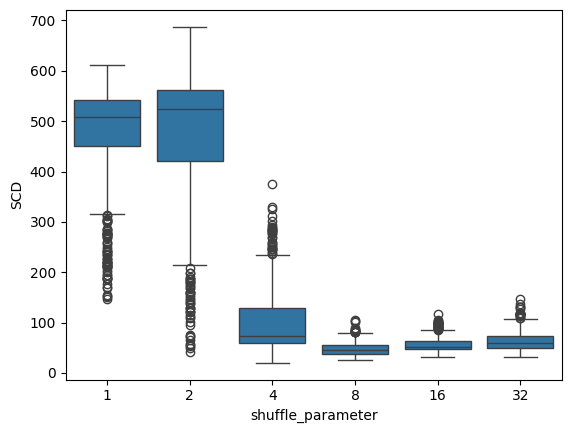

In [9]:
# boxplot by shulffle paramterer
sns.boxplot(data=df, x="shuffle_parameter", y="SCD")

<Axes: xlabel='GC_content', ylabel='SCD'>

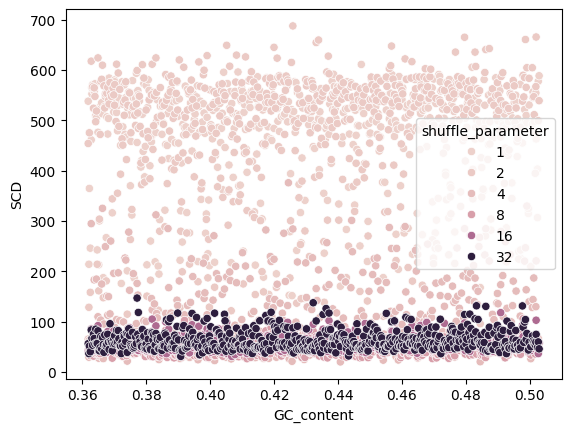

In [10]:
# by GC-content
sns.scatterplot(data=df, x="GC_content", y="SCD", hue="shuffle_parameter")

<Axes: xlabel='GC_content', ylabel='SCD'>

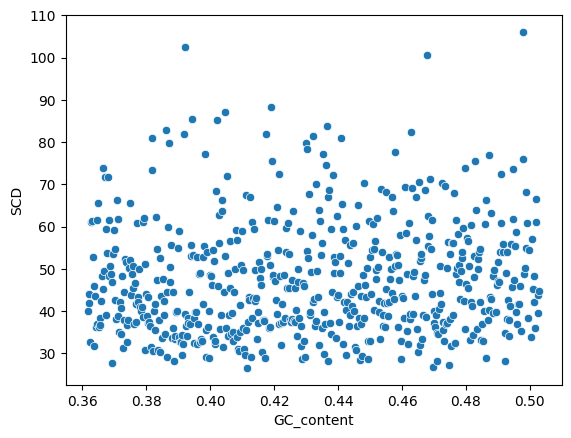

In [11]:
# scatterplot only for shuffle_parameter == 8
sns.scatterplot(data=df[df["shuffle_parameter"] == 8], x="GC_content", y="SCD")